In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import tensorflow as tf

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [7]:
df=pd.read_csv('telecom_churn.csv')

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [11]:
df_num=df.select_dtypes(['float64','int64'])

In [12]:
df_num.head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [13]:
df_cat=df.select_dtypes(object)

In [14]:
df_cat.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [15]:
df_cat["TotalCharges"].replace(' ',np.nan,inplace=True)

In [16]:
df_cat['TotalCharges'].isnull().sum()

11

In [17]:
df_cat["TotalCharges"]=df_cat["TotalCharges"].astype("float")

In [18]:
df_cat["TotalCharges"].fillna(df_cat["TotalCharges"].mean(),inplace=True)

In [19]:
df_num["TotalCharges"]=df_cat["TotalCharges"]

In [20]:
df_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [21]:
df_cat.drop('TotalCharges',axis=1,inplace=True)

In [22]:
df_cat.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [23]:
for col in df_cat:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [24]:
df_cat.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,5375,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,3962,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,2564,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,5535,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,6511,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [25]:
df_new=pd.concat([df_cat,df_num],axis=1)

In [26]:
df_new.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,5375,0,1,0,0,1,0,0,2,0,...,0,0,0,1,2,0,0,1,29.85,29.85
1,3962,1,0,0,1,0,0,2,0,2,...,0,0,1,0,3,0,0,34,56.95,1889.50
2,2564,1,0,0,1,0,0,2,2,0,...,0,0,0,1,3,1,0,2,53.85,108.15
3,5535,1,0,0,0,1,0,2,0,2,...,0,0,1,0,0,0,0,45,42.30,1840.75
4,6511,0,0,0,1,0,1,0,0,0,...,0,0,0,1,2,1,0,2,70.70,151.65


In [27]:
df_new.shape

(7043, 21)

In [28]:
df_new.drop('customerID',inplace=True,axis=1)

In [29]:
X=df_new.drop('Churn',axis=1)
Y=df_new["Churn"]

In [30]:
X.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,1,29.85,29.85
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,34,56.95,1889.50
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,0,2,53.85,108.15
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,45,42.30,1840.75
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,0,2,70.70,151.65


In [31]:
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [33]:
ss=StandardScaler()

In [34]:
x_train_ss=ss.fit_transform(X_train)
x_test_ss=ss.transform(X_test)

In [35]:
X.shape

(7043, 19)

In [36]:
model=tf.keras.Sequential([
       tf.keras.layers.Dense(2,activation="relu",input_shape=(X.shape[1],)),
       tf.keras.layers.Dense(3,activation="relu"),
       tf.keras.layers.Dense(1,activation="sigmoid")
])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 53
Trainable params: 53
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer='sgd',loss='binary_crossentropy')

In [39]:
trained_model=model.fit(x_train_ss,Y_train,epochs=50)

Epoch 1/50
155/155 [==============================] - 0s 3ms/step - loss: 0.5658
Epoch 2/50
155/155 [==============================] - 0s 3ms/step - loss: 0.5268
Epoch 3/50
155/155 [==============================] - 0s 3ms/step - loss: 0.5105
Epoch 4/50
155/155 [==============================] - 0s 3ms/step - loss: 0.5026
Epoch 5/50
155/155 [==============================] - 0s 3ms/step - loss: 0.4973
Epoch 6/50
155/155 [==============================] - 0s 3ms/step - loss: 0.4935
Epoch 7/50
155/155 [==============================] - 0s 2ms/step - loss: 0.4903
Epoch 8/50
155/155 [==============================] - 0s 2ms/step - loss: 0.4875
Epoch 9/50
155/155 [==============================] - 0s 2ms/step - loss: 0.4851
Epoch 10/50
155/155 [==============================] - 0s 2ms/step - loss: 0.4830
Epoch 11/50
155/155 [==============================] - 0s 2ms/step - loss: 0.4811
Epoch 12/50
155/155 [==============================] - 0s 2ms/step - loss: 0.4796
Epoch 13/50
155/155 [====

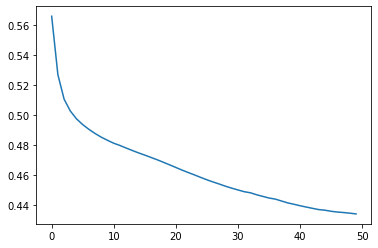

In [40]:
plt.plot(trained_model.history['loss'])

In [41]:
Y_pred=model.predict(x_test_ss)

In [42]:
Y_pred

array([[0.08625802],
       [0.1338506 ],
       [0.27862448],
       ...,
       [0.62057066],
       [0.08472052],
       [0.0443671 ]], dtype=float32)

In [43]:
Y_pred=np.where(Y_pred >= 0.5,1,0)

In [44]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1585
           1       0.62      0.57      0.59       528

    accuracy                           0.80      2113
   macro avg       0.74      0.73      0.73      2113
weighted avg       0.80      0.80      0.80      2113

